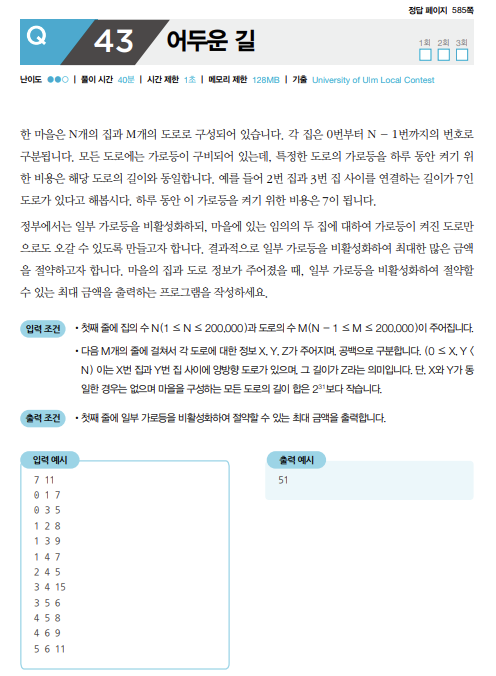

## 답안 ver

In [ ]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]
 
# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
 
# 노드의 개수와 간선의 개수 입력받기
n, m = map(int, input().split())
parent = [0] * (n + 1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, n + 1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력받기
for _ in range(m):
    x, y, z = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((z, x, y))

# 간선을 비용순으로 정렬
edges.sort()
total = 0 # 전체 가로등 비용

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    total += cost
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost

print(total - result)